In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
DATADIR= "C:/Users/moham/Desktop/images with masks/"
ImageCats = ['masks','original image']
categories = ['Benign','Cancer','Normal']
from skimage import io
images= []
masksBA = []
masksBG = []
def createdata():
    for filecategory in ImageCats:
        file=os.path.join(DATADIR,filecategory)
        FileType = ImageCats.index(filecategory)
        print(FileType)
        for category in os.listdir(file):
            path = os.path.join(file,category)
            classnum=categories.index(category)
            for img in os.listdir(path):
                img_sk = io.imread(os.path.join(path,img))
                if FileType==0:
                    if img.lower().find('breastarea')==-1:
                        masksBG.append([img_sk,FileType,classnum])
                        print(img)
                    else:
                        masksBA.append([img_sk,FileType,classnum])
                        print(img)
                elif FileType==1:
                    images.append([img_sk,FileType,classnum])
                    print(img)

createdata()

0
A_1123_1_LEFT_CC_breastArea.ome.tiff
A_1123_1_LEFT_MLO_breastArea.ome.tiff
A_1124_1_LEFT_CC_breastArea.ome.tiff
A_1124_1_LEFT_MLO_breastArea.ome.tiff
A_1170_1_RIGHT_CC_breastArea.ome.tiff
A_1170_1_RIGHT_MLO_breastArea.ome.tiff
A_1177_1_RIGHT_CC_breastArea.ome.tiff
A_1177_1_RIGHT_MLO_breastArea.ome.tiff
A_1000_1_LEFT_CC_breastArea.ome.tiff
A_1000_1_LEFT_MLO_breastArea.ome.tiff
A_1329_1_LEFT_CC_breastArea.ome.tiff
A_1329_1_LEFT_MLO_breastArea.ome.tiff
A_1399_1_RIGHT_MLO_breastArea.ome.tiff
A_1400_1_LEFT_CC_breastArea.ome.tiff
A_1400_1_LEFT_MLO_breastArea.ome.tiff
A_1401_1_RIGHT_CC_breastArea.ome.tiff
A_0002_1_LEFT_CC_breastArea.ome.tiff
A_0002_1_LEFT_MLO_breastArea.ome.tiff
A_0002_1_RIGHT_CC_breastArea.ome.tiff
A_0002_1_RIGHT_MLO_breastArea.ome.tiff
A_0003_1_LEFT_CC_breastArea.ome.tiff
A_0003_1_LEFT_MLO_breastArea.ome.tiff
A_0003_1_RIGHT_CC_breastArea.ome.tiff
A_0003_1_RIGHT_MLO_breastArea.ome.tiff
1
A_1123_1.LEFT_CC.png
A_1123_1.LEFT_MLO.png
A_1124_1.LEFT_CC.png
A_1124_1.LEFT_MLO.png


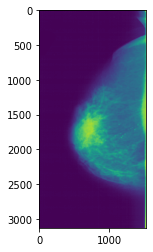

In [6]:
for img,a,b in images:
    print (a)
    print(b)
    plt.imshow(img)
    plt.show()
    break

In [9]:
fig=plt.figure(figsize=(20,50))
rows = 24
columns = 3
i=0
for (img,imlabel,namei),(mBA,BAlabel,nameBA),(mBG,BGLabel,nameBG) in zip(images,masksBA,masksBG):
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(img )
    plt.title("Orig Img")
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(mBA )
    plt.title("BA Seg Mask")
    i+=1
    fig.add_subplot(rows, columns, i)
    plt.imshow(mBG)
    plt.title("BG Seg Mask")
    fig.tight_layout(pad=1)

    fig.savefig("data with masks.png")
    fig.show()

<Figure size 1440x3600 with 0 Axes>

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image, grayscale, Otsu's threshold
image = cv2.imread('C:/Users/moham/Desktop/images with masks/original image/A_0002_1.LEFT_CC.png')
mask = cv2.imread('C:/Users/moham/Desktop/images with masks/masks/A_0002_1_LEFT_CC_breastArea.ome.tiff')
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove background using bitwise-and operation
result = cv2.bitwise_and(image, image, mask=mask)
# result[thresh==0] = [255,255,255] # Turn background white

# plt.imshow( thresh)
# plt.show()
plt.imshow( result)
plt.show()

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [3]:
import os
path = "C:/Users/moham/Desktop/cropped images/"
print(os.listdir(path))

[]


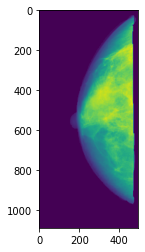

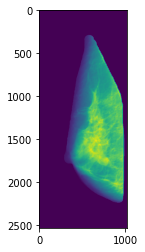

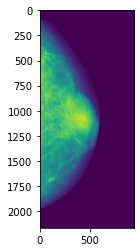

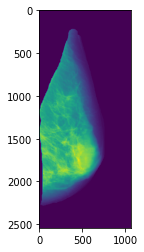

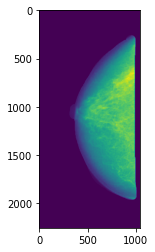

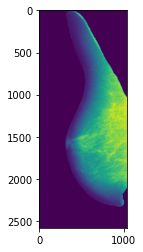

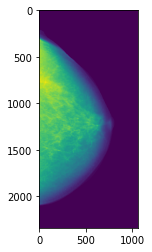

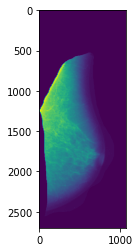

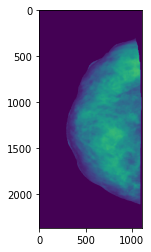

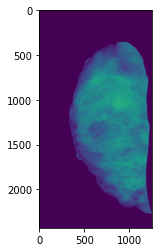

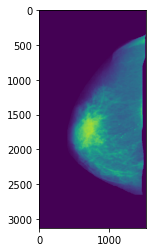

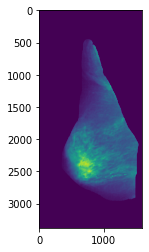

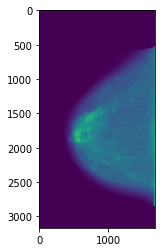

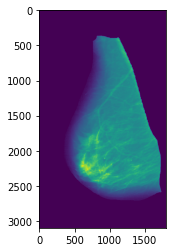

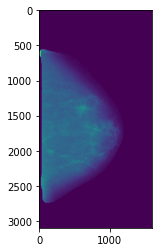

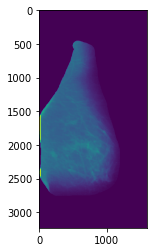

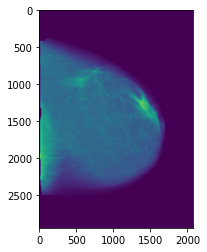

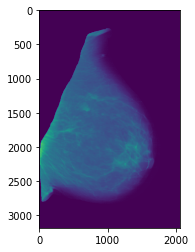

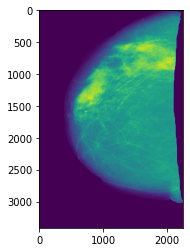

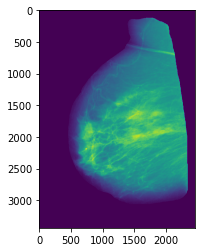

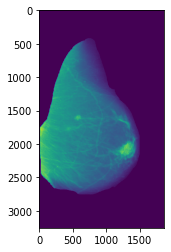

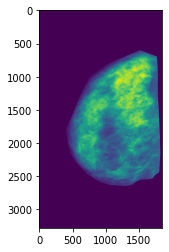

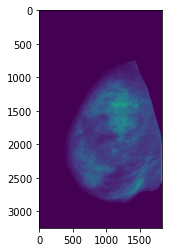

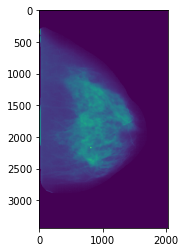

In [7]:
import cv2
import matplotlib.pyplot as plt
i=0
for (img,imlabel,namei),(mBA,BAlabel,nameBA) in zip(images,masksBA):
    cropped=cv2.bitwise_and(img,img, mask=mBA)
    cv2.imwrite(os.path.join(path, "%s_"%imlabel+'_'+namei+'.png'),cropped)
    plt.imshow(cropped)
    plt.show()
    i+=1

In [1]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    fill_mode='constant',
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [ ]:
import matplotlib.pyplot as plt
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for npimage in X_batch[0:5]:
        plt.imshow(npimage, cmap="gray")
        plt.show()
    break